# Myopia Unsupervised Learning Analysis
This notebook looks at myopia patient data and attempts to classify patients into clusters/categories based on their data. The clusters could then be further analysed to predict myopia based on the measures in the data. To prepare the data for cluster analysis, it is first scaled using a standard scaler:

$z=\dfrac{(x-\overline{x})}{\sigma_x},$

where $x$ is the value of the feature, $\overline{x}$ is the mean of the entire feature and $\sigma_x$ is the standard devation of the feature. After scaling, the data is reduced to principal components retaining approxamately 90% of the vaiance in the original data. Then to better visualize the data, t-SNE is performed to reduce the data to 2 demensions so it can easily be plotted. Finally K-Means is performed for various cluster values and the optimal candidate for the number of clusters is chosen by analysing an elbow curve. 

In [10]:
# work around code for K-Means on Windows OS
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
# dependencies and path
import pandas as pd
from sklearn.preprocessing import StandardScaler as SS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans as KM
path = 'Resources/myopia.csv'

## Part 1: Prepare the Data

In [3]:
# load data into dataframe and remove 'MYOPIC' columnn
df = pd.read_csv(path)
X = df.drop('MYOPIC', axis=1)
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# scale data with standard scaler
X_scale = SS().fit_transform(X)
X_scale.shape

(618, 14)

## Part 2: Apply Dimensionality Reduction

In [5]:
# perform principal component analysis 
X_scale_pca = PCA(n_components=0.9).fit_transform(X_scale)
X_scale_pca.shape

(618, 10)

In [6]:
# perform t-SNE
X_scale_pca_tsne = TSNE(n_components=2, learning_rate=2000, init='random').fit_transform(X_scale_pca)
X_scale_pca_tsne.shape

(618, 2)

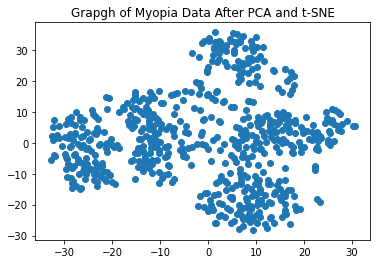

In [7]:
# plot the '2'-demensional data
plt.scatter(X_scale_pca_tsne[:,0], X_scale_pca_tsne[:,1])
plt.title('Grapgh of Myopia Data After PCA and t-SNE')
plt.show()

Note there appears to be 3 or 4 clusters.

## Part 3: Perform Cluster Analysis with K-means

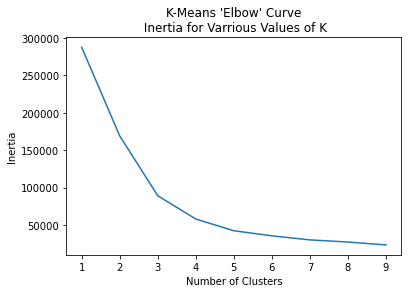

In [8]:
numbers_of_clusters = range(1, 10)
inertias = [KM(n_clusters=number_of_clusters).fit(X_scale_pca_tsne).inertia_ for number_of_clusters in numbers_of_clusters]
plt.plot(numbers_of_clusters, inertias)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title("K-Means 'Elbow' Curve\n Inertia for Varrious Values of K")
plt.show()

The 'Eblow' curve shows a significant drop in inertia for positvie $k<4$ and for values of $k\geq5$, the drop in inertia is relatively constant and low. Therefore it appears $k=4$ would be a good nunmber of clusters. 

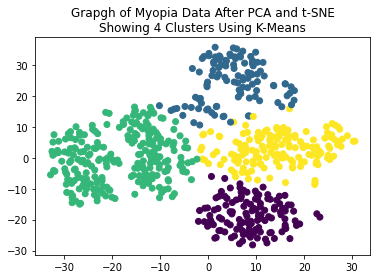

In [9]:
km = KM(n_clusters=4).fit(X_scale_pca_tsne)
clusters = km.predict(X_scale_pca_tsne)
plt.scatter(X_scale_pca_tsne[:,0], X_scale_pca_tsne[:,1], c=clusters)

plt.title('Grapgh of Myopia Data After PCA and t-SNE\nShowing 4 Clusters Using K-Means')
plt.show()

## Part 4: Recomendation

This notebook takes data for 680 patients across 14 different measures and reduces it to ~4 clusters of patients across 2 aggregate components. The K-Means analysis shows the data can be clustered. Although, due to the PCA and t-SNE steps performed before the K-Means, the specific conditions for each cluster/group are not imediately clear. 